In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import FunctionsToLoadGaia as load
import astropy.io.ascii, astropy.table

In [21]:

from glob import glob
filenames = glob('data/TgasSource_000-000-*.fits')
print filenames
X, Y, Z, AbsoluteMagnitudes = np.array([]), np.array([]), np.array([]), np.array([])
for f in filenames:
    XX,YY,ZZ,RA,Dec,Magnitudes,Distances,AB,Fluxes,label =load.extractStars(f)
    X = np.append(X, XX)
    Y = np.append(Y, YY)
    Z = np.append(Z, ZZ)
    AbsoluteMagnitudes = np.append(AbsoluteMagnitudes, AB)



['data/TgasSource_000-000-000.fits', 'data/TgasSource_000-000-001.fits', 'data/TgasSource_000-000-002.fits', 'data/TgasSource_000-000-003.fits', 'data/TgasSource_000-000-004.fits', 'data/TgasSource_000-000-005.fits', 'data/TgasSource_000-000-006.fits', 'data/TgasSource_000-000-007.fits', 'data/TgasSource_000-000-008.fits', 'data/TgasSource_000-000-009.fits', 'data/TgasSource_000-000-010.fits', 'data/TgasSource_000-000-011.fits', 'data/TgasSource_000-000-012.fits', 'data/TgasSource_000-000-013.fits', 'data/TgasSource_000-000-014.fits', 'data/TgasSource_000-000-015.fits']


In [28]:
# read the original table

original = astropy.io.ascii.read('data/starshp.dat', 
                            data_start=38,
                            names=['ID', 'X', 'Y', 'Z', 'DX', 'DY', 'DZ', 'BV', 'AbsMag'])


In [ ]:
original

In [ ]:
ID = np.arange(len(X))
DX = np.zeros_like(X)
DY = np.zeros_like(X)
DZ = np.zeros_like(X)
BV = np.zeros_like(X)

au_per_pc = 180/np.pi*60*60
X /= au_per_pc
Y /= au_per_pc
Z /= au_per_pc

gaia = astropy.table.Table([ID, X, Y, Z, DX, DY, DZ, BV, AbsoluteMagnitudes],
        names=['ID', 'X', 'Y', 'Z', 'DX', 'DY', 'DZ', 'BV', 'AbsMag'])
                      




In [8]:
gaia

ID,X,Y,Z,DX,DY,DZ,BV,AbsMag
int64,float64,float64,float64,float64,float64,float64,float64,float64
0,111.236028007,111.36940824,0.646683392605,0.0,0.0,0.0,0.0,2.00625527293
1,180.770176075,181.814390403,0.895266238842,0.0,0.0,0.0,0.0,3.53646489334
2,223.761005217,224.434951526,1.37634815542,0.0,0.0,0.0,0.0,3.23831476566
3,308.100106036,308.816574433,1.88978567015,0.0,0.0,0.0,0.0,2.87710297779
4,445.878331053,448.000685312,3.69614174269,0.0,0.0,0.0,0.0,1.16483881112
5,81.4197611976,81.8225646743,0.724509113408,0.0,0.0,0.0,0.0,4.66035099753
6,123.758370263,124.420920523,1.18333844328,0.0,0.0,0.0,0.0,3.65268601718
7,337.523355959,338.854713203,3.17911098309,0.0,0.0,0.0,0.0,2.16261732713
8,113.981080137,114.021946649,0.987956233675,0.0,0.0,0.0,0.0,3.93353028549


In [15]:
import corner


def visualize(d):
    array = np.vstack([d.columns[i].data for i in np.arange(1,4)]).T
    names = d.colnames

    corner.corner(array, labels=names, 
                  plot_contours=False, 
                  plot_density=False, 
                  plot_datapoints=True, 
                  data_kwargs=dict(alpha=0.01, markersize=0.01)

SyntaxError: invalid syntax (<ipython-input-15-aede1036b047>, line 12)

<IPython.core.display.Javascript object>


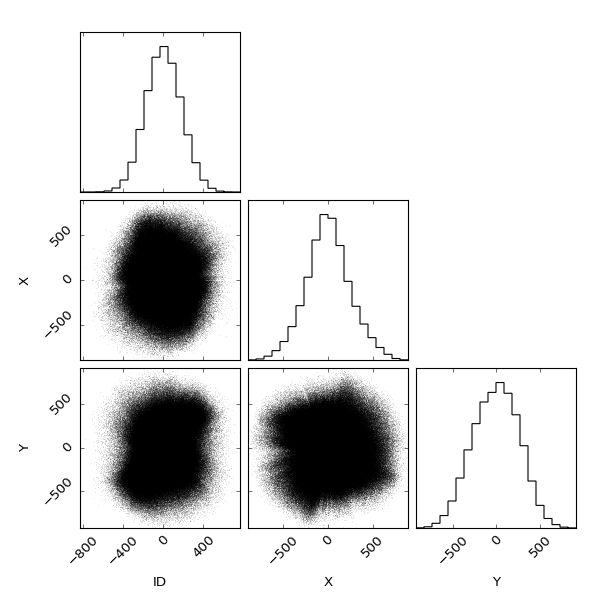

In [16]:
visualize(gaia)